In [197]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import SA 
import time 
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (16.0, 10.0)
import itertools

# Global Search : Simulated Annealing

    Simle metaheuristic algorithm that finde global minimum/maximum.
    A metaheuristic similar to gradient descent.
    
    1º Select randomly a point for a function to minimize.
    2º Select the range (Envirnoment) in which will decide next point to move.
    3º Select randomly a point inside the range of the initial point.
        If it is a better solution, use this one as the initial solution.
        Elsewere with a probability p = exp(-(f(a)-f(b))/Ti) decide if use this new solution or keep the previous one.
               f(a) : The objective function applied to the new point
               f(b) : The objective function applied to the previous point.
               Ti : Temperature in the current moment.
    4º Update the temperature and back to the 3th point. (t <- t/(1+B*t); B=(t_start - t_final)/(K_steps*t_start*t_finalize)  )

In [2]:

#Simulated Annealing Continuous
def SAC(MAX_ITERATIONS, InitialPoint, EnvirnomentRange, InitialTemperature, objectiveFunction, timeUpdateFunction, restrictions=[None,None]
        ,probabilityFunction=None, randomFunction=np.random.rand, debug=False, verbose=False, plotose=False ):
    if probabilityFunction == None : probabilityFunction=lambda a,b,T : probabilityOfSelection(T,b,a)
    CurrentTempreature = InitialTemperature
    Current_solution = [InitialPoint , objectiveFunction(InitialPoint)]
    Best_Solution = [InitialPoint , objectiveFunction(InitialPoint)]
    if plotose :
        Acumulative_values = [Best_Solution[-1]]
    InitialTime = time.time()
    for i in xrange(MAX_ITERATIONS):
        StepTime = time.time()
        while True:
            RandomPoint = (randomFunction(len(Current_solution[0])) - 0.5) * 2
            New_solution = Current_solution[0] + RandomPoint*EnvirnomentRange 
            #print New_solution
            if restrictions[0] == None or restrictions[0] <= New_solution:
                if restrictions[1] == None or restrictions[1] >= New_solution:
                    break
        New_value = objectiveFunction(New_solution)
        if debug: print "Sol ",i,":",New_solution,New_value, " <-> ",Current_solution[0],Current_solution[1]
        if New_value < Current_solution[1] : 
            Current_solution[0] = New_solution
            Current_solution[1] = New_value
        else:
            ExpectedProbility = min([1,probabilityFunction(Current_solution[1],New_value,CurrentTempreature)])
            ObtainedProbability = np.random.rand()
            if debug : print "Exp : ",ExpectedProbility,ObtainedProbability
            if ObtainedProbability <= ExpectedProbility:
                if Best_Solution[1] > Current_solution[1]:
                    Best_Solution[0] = Current_solution[0]
                    Best_Solution[1] = Current_solution[1]
                Current_solution[0] = New_solution
                Current_solution[1] = New_value
        
        #print "Current Temp",CurrentTempreature
        CurrentTempreature = timeUpdateFunction(i,CurrentTempreature)
        if plotose :
            Acumulative_values.append(Best_Solution[-1])
        if verbose == 1:  
            print "Step : ",i," Duration:",(time.time() - StepTime) , "Temperature:",CurrentTempreature," Solution: ",Current_solution[1]," Best solution: ",Best_Solution[1]
    if plotose :
            plt.plot(Acumulative_values)
            plt.title("Best" + str(Best_Solution[1]))
            plt.show()
    if verbose > 0:
        TotalTime = (time.time()-InitialTime)
        print "Total time:" ,TotalTime, " Time per step", TotalTime*1.0/MAX_ITERATIONS, "Best solution : ",Best_Solution[1]
    return Best_Solution

def SAC_GTU(MAX_ITERATIONS, InitialPoint, EnvirnomentRange,  InitialTemperature, FinalTemperature,objectiveFunction, restrictions=[None,None], debug=False, verbose=False, plotose=False):
    return SAC(MAX_ITERATIONS, InitialPoint, EnvirnomentRange, InitialTemperature, objectiveFunction=objectiveFunction,restrictions=restrictions, timeUpdateFunction=lambda i,T : gradualTimmeUpdate(InitialTemperature,FinalTemperature,MAX_ITERATIONS,T), debug=debug, verbose=verbose, plotose=plotose)

In [ ]:
def fo(x): return np.cos(x)/x
    np.random.seed(1)
    R = SAC_GTU(1000,np.asanyarray([10.0]),5.0,100.0,1.0,fo, restrictions=[0,30], plotose=False,verbose=False)
    print R
    print "Test result : ",(int(R[1][0]*10000) == -3364) and (int(R[0][0]*10000) == 28166)

In [43]:
#Default maximization
class SimulatedAnnealing:
    def __init__(self):
        self.T_initial, self.T_final, self.K_steps, self.T_current, self.step, self.alpha, slef.F_current, self.F_new = [None]*8
        self.Number_steps, self.error_percentage, self.best_F, self.Last_k_Fs, self.accepted_percentage= [None]*5
        self.k, self.acepted_in_last_k_steps, self.cutoff, self.number_cutoff_acepted_solutions = [None]*4
        self.TU = None
        self.P = 0
        self.END = []
    
    #Partial Functions
    #TU=0
    def linearTimmeUpdate(self):
        Betta = (self.T_initial - self.T_final*1.0) / (self.K_steps*1.0* self.T_initial * self.T_final)
        return self.T_current*1.0/(1.0 + Betta*self.T_current)
    #TU=1
    def geometriclTimmeUpdate(self):
        #Betta = #(T_initial - T_final*1.0) / (K_steps*1.0* T_initial * T_final)
        return (self.alpha**self.step) * self.T_initial  # T_current*1.0/(1.0 + Betta*T_current)
    #P=0
    def probabilityOfSelection(self):
        return np.random.rand() < min([1.0, np.exp(- (self.F_current - self.F_new*1.0)*1.0/self.T_current)]) if self.F_new < self.F_current else True 

    #END=0
    def endCondiction_error_modification(self):
         return (min(self.Last_k_Fs) < self.best_F - (self.best_F*self.error_percentage))   #error_percentage*1.0  * Number_steps     

    #END=1
    def endCondiction_error_modification(self):
         return self.error_percentage*self.Number_steps > self.acepted_in_k_steps 

    #END=2
    def endCondiction_cutoffs(self):
         return self.cutoff*self.Number_steps < self.number_aceoted_solutions 
        
    #END=3
    def endCondiction_MaxSteps(self):
         return self.Number_steps < self.step 
        
    #Aggregation_functions
    def linearTimmeUpdate(self, T_initial, T_final, K_steps):
        self.T_initial, self.T_final, self.K_steps = T_initial, T_final, K_steps
        self.TU = 0
        
    def geometriclTimmeUpdate(self, T_initial, alpha=0.95):
        self.T_initial, self.alpha = T_initial, alpha
        self.TU = 1
        
    def probabilityOfSelection(self):
         pass # Default
            
    def endCondiction_error_modification(self,Number_steps, error_percentage,k):
        self.Number_steps, self.error_percentage, self.k =  Number_steps, error_percentage, k
        self.END.append(0)
        
    def endCondiction_error_modification(self,Number_steps, accepted_percentage, k):
        self.Number_steps, self.accepted_percentage, self.k = Number_steps, accepted_percentage, k
        self.END.append(1)
        
    def endCondiction_cutoffs(self,Number_steps, cutoff):
        self.Number_steps, self.cutoff = Number_steps, cutoff
        self.END.append(2)
        
    def endCondiction_MaxSteps(self,Number_steps):
        self.Number_steps = Number_steps
        self.END.append(3)
        
    #Algorithm

In [12]:
#SAC(100,np.asanyarray([10.0]),1.0,15.0,fo,lambda i,T : gradualTimmeUpdate(15.0,1.0,100,T))
def test1():
    def fo(x): return np.cos(x)/x
    np.random.seed(1)
    R = SAC_GTU(1000,np.asanyarray([10.0]),5.0,100.0,1.0,fo, restrictions=[0,30], plotose=False,verbose=False)
    print R
    print "Test result : ",(int(R[1][0]*10000) == -3364) and (int(R[0][0]*10000) == 28166)
    
    

In [19]:
#R = test1()
SAC_GTU(100,np.asanyarray([10.0]),5.0,100.0,1.0,fo, restrictions=[0,30], plotose=False,verbose=True)

Step :  0  Duration: 0.0 Temperature: 50.2512562814  Solution:  [-0.05675213]  Best solution:  [-0.08390715]
Step :  1  Duration: 0.0 Temperature: 33.5570469799  Solution:  [ 0.16079354]  Best solution:  [-0.08390715]
Step :  2  Duration: 0.0 Temperature: 25.1889168766  Solution:  [-0.00303147]  Best solution:  [-0.08390715]
Step :  3  Duration: 0.0 Temperature: 20.1612903226  Solution:  [-0.09953604]  Best solution:  [-0.08390715]
Step :  4  Duration: 0.0 Temperature: 16.8067226891  Solution:  [ 0.05232591]  Best solution:  [-0.09953604]
Step :  5  Duration: 0.0 Temperature: 14.409221902  Solution:  [-0.04902061]  Best solution:  [-0.09953604]
Step :  6  Duration: 0.0 Temperature: 12.6103404792  Solution:  [ 0.03669638]  Best solution:  [-0.09953604]
Step :  7  Duration: 0.0 Temperature: 11.2107623318  Solution:  [-0.03451065]  Best solution:  [-0.09953604]
Step :  8  Duration: 0.0 Temperature: 10.0908173562  Solution:  [-0.03451065]  Best solution:  [-0.09953604]
Step :  9  Duration:

[array([ 2.64847986]), array([-0.33259216])]

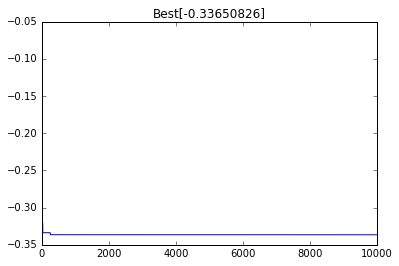

Total time: 0.244999885559  Time per step 2.44999885559e-05 Best solution :  [-0.33650826]


[array([ 2.79742399]), array([-0.33650826])]

In [3]:
def fo(x): return np.cos(x)/x
SA.SAC_GTU(10000,np.asanyarray([10.0]),5.0,100.0,1.0,fo, restrictions=[0,30], plotose=True,verbose=2)

In [265]:
def linearTimmeUpdate(T_initial, T_final, K_steps, T_current):
    Betta = (T_initial - T_final*1.0) / (K_steps*1.0* T_initial * T_final)
    return T_current*1.0/(1.0 + Betta*T_current)

def geometriclTimmeUpdate(T_initial, step, alpha=0.95):
    #Betta = #(T_initial - T_final*1.0) / (K_steps*1.0* T_initial * T_final)
    return (alpha**step) * T_initial  # T_current*1.0/(1.0 + Betta*T_current)

def probabilityOfSelection(T_current, F_current, F_new):
    A= min([1.0, np.exp(- (F_new*1.0-F_current)*1.0/T_current)]) > np.random.rand() if F_new > F_current else True
    #print A,F_new > F_current,np.exp(- (F_new*1.0-F_current)*1.0/T_current)
    return A

def endCondiction_error_modification(Number_steps, error_percentage, best_F, Last_k_Fs):
    #print (min(Last_k_Fs) - best_F),error_percentage
    return np.abs(min(Last_k_Fs) - best_F)/np.abs(best_F) > error_percentage   #error_percentage*1.0  * Number_steps     

def endCondiction_accepted_percentage(Number_steps, accpeted_percentage, acepted_in_last_k_steps):
    return accpeted_percentage*Number_steps < acepted_in_last_k_steps 

def endCondiction_cutoffs(Number_steps, cutoff, number_aceoted_solutions):
     return cutoff*Number_steps < number_aceoted_solutions 
    
def endCondiction_MaxSteps(Number_steps, step):
         return Number_steps < step 
    
def fo(x): return np.cos(x*1.0)*1.0/x

In [260]:
def SelectTemperaturesRange(Initial_percentage_aceptance, Final_percentage_aceptance, Test_times, Objective_function, Restrictions, Envirnoment, verbose=False):
    Initial_points = np.random.rand(Test_times) * Restrictions[1] + Restrictions[0]
    Perturbations = np.random.rand(Test_times) * Envirnoment*2 - Envirnoment
    New_points = Initial_points + Perturbations
    Correct_perturbed_1 = np.where(New_points >= Restrictions[0])[0]
    Correct_perturbed_2 = np.where(New_points <= Restrictions[1])[0]
    Correct_perturbed = np.intersect1d(Correct_perturbed_1,Correct_perturbed_2)
    #filter(lambda x : x >= Restrictions[0] and x <= Restrictions[1] , 
    #print New_points[Correct_perturbed], len(Correct_perturbed)
    Non_improvements = np.where(Objective_function(Initial_points[Correct_perturbed]) < Objective_function(New_points[Correct_perturbed]))[0] 
    #print Objective_function(Initial_points[Non_improvements]) < Objective_function(New_points[Non_improvements])
    #print len(Non_improvements)
    MEAN_DIF = np.mean( np.abs(Objective_function(Initial_points[Correct_perturbed][Non_improvements]) - Objective_function(New_points[Correct_perturbed][Non_improvements])) )
    Initial_temperature = -MEAN_DIF/ np.log(Initial_percentage_aceptance)
    Final_temperature = -MEAN_DIF/ np.log(Final_percentage_aceptance)
    if verbose:
        RES2 = SelectTemperaturesRange(Initial_percentage_aceptance, Final_percentage_aceptance, Test_times, Objective_function, Restrictions, Envirnoment, verbose=False)
        print "In ",Test_times," tests, with envirnoment : ",Envirnoment
        print "Mean difference of non improvement perturbations : ", MEAN_DIF
        print "Intial temperature for a ", Initial_percentage_aceptance, "% of aceptance : ",Initial_temperature
        print "Intial percentage optained for other Sample :", np.exp(-RES2[2] / Initial_temperature)
        print "Final temperature for a ", Final_percentage_aceptance, "% of aceptance : ",Final_temperature
        print "Final percentage optained for other Sample:", np.exp(-RES2[2] / Final_temperature)
    return Initial_temperature,Final_temperature, MEAN_DIF

#print np.log(0.9)
#SelectTemperaturesRange(0.999,0.5,100,fo,[10**-4,30],1, verbose=True)

-0.105360515658
In  100  tests, with envirnoment :  1
Mean difference of non improvement perturbations :  0.110010777236
Intial temperature for a  0.999 % of aceptance :  109.955762676
Intial percentage optained for other Sample : 0.997708306481
Final temperature for a  0.5 % of aceptance :  0.158712002763
Final percentage optained for other Sample: 0.204025853906


(109.95576267555852, 0.15871200276319122, 0.11001077723632824)

In [405]:
#Simulated Annealing Continuous
def SIM_AN(
MAX_ITERATIONS=10000,
InitialPoint = np.random.rand()*30.0,
EnvirnomentRange = 1,
objectiveFunction = fo,
restrictions=[10**-100,30],
Intial_percentage =0.999,
Final_percentage =0.3,
InitialTemperature=100,
FinalTemperature = 1000,
USE_TEMPERATURE=False,
alpha = 0.99,
TEMPERATURE_EVOLUTION=0,
debug=False,
verbose=2,
plotose=False,
#if probabilityFunction == None : probabilityFunction=lambda a,b,T : probabilityOfSelection(T,b,a)
accpeted_percentage=1.0,
error_percentage=10000.0,
k1= 500,
k2=500,
cutoff =1.0,

UP = 0.1,
LL = 0.01,

REC = 0.01,
DES = 0.001,

Ec = 0.01,


Metodo_de_aceptacion = 0
#0 : Probabilidad
#1 : Umbral
#2 : Gran Diluvio
#3 : Recuerdo del recuerdo del viaje
#4 : Microcacanonic annealing method
):
    if not USE_TEMPERATURE : 
        InitialTemperature,FinalTemperature, Mean_RE = SelectTemperaturesRange(Intial_percentage,Final_percentage,100,fo,[10**-4,30],1, verbose=verbose)
    CurrentTempreature = InitialTemperature
    Current_solution = [InitialPoint , objectiveFunction(InitialPoint)]
    Best_Solution = [InitialPoint , objectiveFunction(InitialPoint)]
    if debug:
        OutOfRangeRandoms = 0
    BEST_Acumulative_values = [Best_Solution[-1]]
    Acumulative_values_prefered = [Current_solution[-1]]
    Acumulative_values_tested = [Current_solution[-1]]
    BEST_Acumulative_sol = [Best_Solution[0]]
    Acumulative_sol_prefered = [Current_solution[0]]
    Acumulative_sol_tested = [Current_solution[0]]
    InitialTime = time.time()
    Step = 0
    k_buffer_acceptance=[]
    k_buffer_F=[]
    Total_aceptance_count = 0
    Ecs,LLs,RECs,Ts = [],[],[],[]
    while True:
        Step += 1
        StepTime = time.time()
        Ecs += [Ec]
        LLs += [LL]
        RECs += [REC]
        Ts += [CurrentTempreature]
        while True: #Solo cogemos datos restringidos
            RandomPoint = np.random.rand()*2.0 - 1.0
            New_solution = Current_solution[0] + RandomPoint*EnvirnomentRange 
            #print New_solution
            if restrictions[0] == None or restrictions[0] <= New_solution:
                if restrictions[1] == None or restrictions[1] >= New_solution:
                    break
            if debug : OutOfRangeRandoms+=1
        New_value = objectiveFunction(New_solution)
        if debug: print "Sol ",Step,":",New_solution,New_value, " <-> ",Current_solution[0],Current_solution[1]

        #print New_value, New_solution, Current_solution
        Update_current_solution = False
        RES_TP = [(Metodo_de_aceptacion == 0 and probabilityOfSelection(CurrentTempreature, Current_solution[1], New_value))
                                    ,(Metodo_de_aceptacion == 1 and np.abs(New_value - Current_solution[1]) > CurrentTempreature)
                                    ,(Metodo_de_aceptacion == 2 and (New_value) > LL)
                                    ,(Metodo_de_aceptacion == 3 and (New_value) > (REC-DES))
                                    ,(Metodo_de_aceptacion == 4 and np.abs(New_value - Current_solution[1]) < Ec)]
        #print RES_TP
        Update_current_solution = sum(RES_TP)
        #if Metodo_de_aceptacion == 0 : Update_current_solution = probabilityOfSelection(CurrentTempreature, Current_solution[1], New_value)
        #if Metodo_de_aceptacion == 1 : Update_current_solution = np.abs(New_value - Current_solution[1]) > CurrentTempreature
        #if Metodo_de_aceptacion == 2 : Update_current_solution = (New_value) > LL
        #if Metodo_de_aceptacion == 3 : Update_current_solution = (New_value) > (REC-DES)
        #if Metodo_de_aceptacion == 4 : Update_current_solution = np.abs(New_value - Current_solution[1]) < Ec
        #if Update_current_solution == 0 : print  " +++ SI +++"
        #print Metodo_de_aceptacion,Update_current_solution
        #print probabilityOfSelection(CurrentTempreature, Current_solution[1], New_value),np.abs(New_value - Current_solution[1]) > CurrentTempreature,(New_value) > LL,(New_value) > (REC-DES),np.abs(New_value - Current_solution[1]) < Ec
        if New_value > REC:
            REC = New_value

        if Update_current_solution:
            Ec = Ec - np.abs(New_value - Current_solution[1])
            Current_solution[0] = New_solution
            Current_solution[1] = New_value
            Total_aceptance_count += 1
            LL += UP


        if Best_Solution[1] > Current_solution[1]:
            Best_Solution[0] = Current_solution[0]
            Best_Solution[1] = Current_solution[1]


        #termination conditions
        if Step > k1 : 
                k_buffer_acceptance[:-1] = k_buffer_acceptance[1:]
                k_buffer_acceptance[-1] = 1 if New_value == Current_solution[1] else 0
        else:
            k_buffer_acceptance.append(1 if New_value == Current_solution[1] else 0)


        if Step > k2 :
                k_buffer_F[:-1] = k_buffer_F[1:]
                k_buffer_F[-1] = New_value   
        else: 
            k_buffer_F.append(New_value)

        BEST_Acumulative_values += [Best_Solution[1]]
        Acumulative_values_prefered += [Current_solution[1]]
        Acumulative_values_tested += [New_value]
        BEST_Acumulative_sol += [Best_Solution[0]]
        Acumulative_sol_prefered += [Current_solution[0]]
        Acumulative_sol_tested += [New_solution]

        #print "Current Temp",CurrentTempreature
        if TEMPERATURE_EVOLUTION == 0:
            CurrentTempreature = linearTimmeUpdate(InitialTemperature, FinalTemperature, MAX_ITERATIONS, CurrentTempreature)
        if TEMPERATURE_EVOLUTION == 1:
            CurrentTempreature = geometriclTimmeUpdate(InitialTemperature, Step,alpha)
        
        if plotose :
            Acumulative_values.append(Best_Solution[-1])
        if verbose == 1:  
            print "Step : ",Step," Duration:",(time.time() - StepTime) , "Temperature:",CurrentTempreature," Solution F: ",Current_solution[1]," Best solution F: ",Best_Solution[1]
        if endCondiction_MaxSteps(MAX_ITERATIONS, Step):
            if verbose : print "End by Max Steps"
            break
        if Step > k1 :
            if endCondiction_accepted_percentage(MAX_ITERATIONS, accpeted_percentage, sum(k_buffer_acceptance)):
                if verbose : print "End by Accepted Percentage",MAX_ITERATIONS
                break
        if Step > k2 :
            if endCondiction_error_modification(MAX_ITERATIONS, error_percentage, Best_Solution[1], k_buffer_F):
                if verbose : print "End by Error Modification"
                break
        if endCondiction_cutoffs(MAX_ITERATIONS, cutoff, Total_aceptance_count):
            if verbose : print "End by CUTOFFS"
            break

    if plotose :
            plt.plot(Acumulative_values)
            plt.title("Best" + str(Best_Solution[1]))
            plt.show()
    if verbose > 0:
        TotalTime = (time.time()-InitialTime)
        print "Total time:" ,TotalTime, " Time per step", TotalTime*1.0/MAX_ITERATIONS,"Steps:",Step, "Best solution : ",Best_Solution[1]
    OTHER_OUTPUT= []
    OTHER_OUTPUT += [[BEST_Acumulative_sol,BEST_Acumulative_values]]
    OTHER_OUTPUT += [[Acumulative_sol_prefered, Acumulative_values_prefered]]
    OTHER_OUTPUT += [[Acumulative_sol_tested, Acumulative_values_tested]]
    OTHER_OUTPUT += [Ecs,LLs,RECs,Ts]
    return Best_Solution,Step, OTHER_OUTPUT


In [406]:
def plot_results(ALGO_RESULT,SHOW_IMG=True, SAVE_FILE=False, File_name="GS"):
    plt.plot(RES[2][0][1],"r")
    plt.plot(RES[2][1][1],"b")
    plt.plot(RES[2][2][1],"g")
    plt.xlim(0,len(RES[2][0][1]))
    plt.title("Evolution of : F(x) = cos(x)/x")
    plt.xlabel("Number of steps")
    plt.ylabel("f")
    if SAVE_FILE :plt.savefig(File_name+'_EVF.png')
    if SHOW_IMG: plt.show()
    plt.close()

    plt.plot(RES[2][0][0],"r")
    plt.plot(RES[2][1][0],"b")
    plt.plot(RES[2][2][0],"g")
    plt.xlim(0,len(RES[2][0][1]))
    plt.title("Evolution of : x")
    plt.xlabel("Number of steps")
    plt.ylabel("x")
    if SAVE_FILE :plt.savefig(File_name+'_EVX.png')
    if SHOW_IMG: plt.show()
    plt.close()

    plt.plot(RES[2][-1],"r")
    plt.xlim(0,len(RES[2][0][1]))
    #plt.hlines(2.89255277615,0,Step)
    plt.title("Evolution of : Temperature")
    plt.xlabel("Number of steps")
    plt.ylabel("Temperature")
    if SAVE_FILE :plt.savefig(File_name+'_EVT.png')
    if SHOW_IMG: plt.show()
    plt.close()

    plt.plot(RES[2][-2],"r")
    plt.xlim(0,len(RES[2][0][1]))
    plt.title("Evolution of : Records")
    plt.xlabel("Number of steps")
    plt.ylabel("Records")
    if SAVE_FILE :plt.savefig(File_name+'_EVREC.png')
    if SHOW_IMG: plt.show()
    plt.close()

    plt.plot(RES[2][-3],"r")
    plt.xlim(0,len(RES[2][0][1]))
    plt.title("Evolution of : Rain")
    plt.xlabel("Number of steps")
    plt.ylabel("Rain")
    if SAVE_FILE :plt.savefig(File_name+'_EVLL.png')
    if SHOW_IMG: plt.show()
    plt.close()

    plt.plot(RES[2][-4],"r")
    plt.xlim(0,len(RES[2][0][1]))
    plt.title("Evolution of : Ec")
    plt.xlabel("Number of steps")
    plt.ylabel("Ec")
    if SAVE_FILE :plt.savefig(File_name+'_EVEc.png')
    if SHOW_IMG: plt.show()
    plt.close()

[2.7979416203378813, -0.33650838368231883]


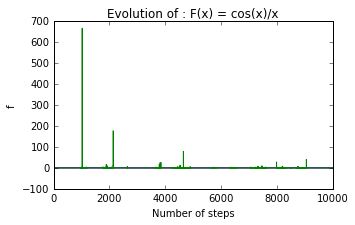

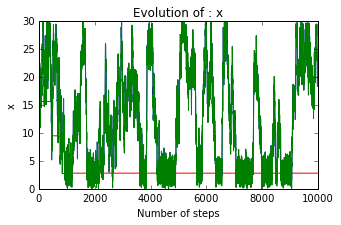

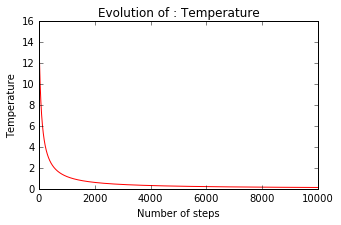

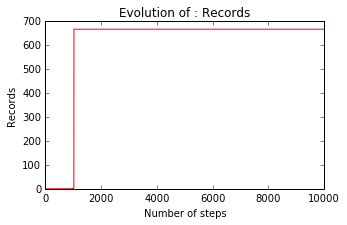

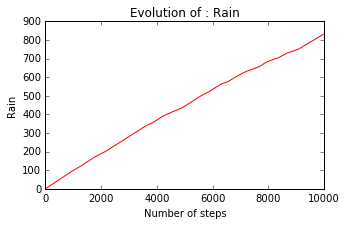

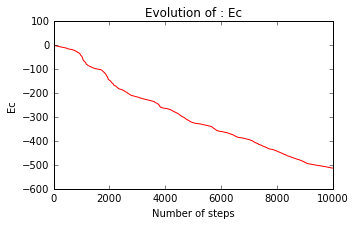

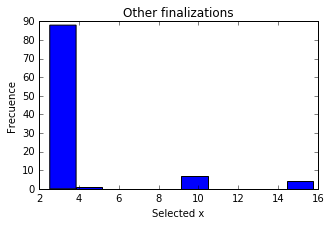

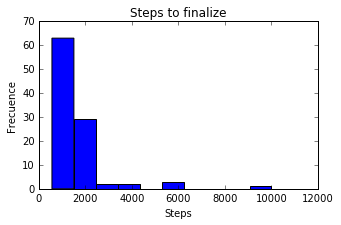

In [439]:
pylab.rcParams['figure.figsize'] = (4.0, 2.0)
RES = SIM_AN(verbose=False, MAX_ITERATIONS=10000,  Intial_percentage=0.99, Final_percentage=0.3, EnvirnomentRange=2)
print RES[0]
plot_results(RES,SAVE_FILE=True, SHOW_IMG=True)
RESS = []
STEPSS = []
for s in xrange(100):
    RE = SIM_AN(verbose=False, MAX_ITERATIONS=10000,  Intial_percentage=0.99, Final_percentage=0.3, EnvirnomentRange=2
                  , k1= 1, k2=500, accpeted_percentage=1.0, error_percentage=0.01)
    RESS += RE[0][:1]
    STEPSS += [RE[1]]
#print RESS
plt.hist(RESS)
plt.title("Other finalizations")
plt.xlabel("Selected x")
plt.ylabel("Frecuence")
plt.savefig("Other_x.png")
plt.show()


plt.hist(STEPSS)
plt.title("Steps to finalize")
plt.xlabel("Steps")
plt.ylabel("Frecuence")
plt.savefig("other_steps.png")
plt.show()

In [230]:
RES = SIM_AN(MAX_ITERATIONS=1000)
print RES[2][0][1]

In  100  tests, with envirnoment :  1
Mean difference of non improvement perturbations :  0.105389772266
Intial temperature for a  0.999 % of aceptance :  105.337068593
Intial percentage optained for other Sample : 0.999529449221
Final temperature for a  0.3 % of aceptance :  0.0875350106641
Final percentage optained for other Sample: 0.567576183384
End by Accepted Percentage
Total time: 0.00800013542175  Time per step 8.00013542175e-06 Steps: 501 Best solution :  -0.0637915530396
[-0.063246796341450195, -0.063246796341450195, -0.063246796341450195, -0.063246796341450195, -0.063246796341450195, -0.063246796341450195, -0.063246796341450195, -0.063246796341450195, -0.063246796341450195, -0.063246796341450195, -0.063246796341450195, -0.063246796341450195, -0.063246796341450195, -0.063246796341450195, -0.063246796341450195, -0.063246796341450195, -0.063246796341450195, -0.063246796341450195, -0.063246796341450195, -0.063246796341450195, -0.063470753216013684, -0.063470753216013684, -0.0634

In [211]:
TEMPERATURA_INCIO = [0.9, 0.99, 0.999, 0.9999]
TEMPERATURA_FINAL = [0.6,0.5,0.4,0.3,0.2,0.1]
ERORES_P = [0.1,0.01,0.001]
ERORES_K = [10,100,200,500,1000]
CUTOFFS = [0.4,0.5,0.6,0.7]
ENTORNO = [0.25,0.5,1,2,4,5]
COMBINATION = TEMPERATURA_INCIO, TEMPERATURA_FINAL, ERORES_P, ERORES_K,ERORES_P, ERORES_K, CUTOFFS, ENTORNO
R =np.asanyarray(list(itertools.product(*COMBINATION)))
RES = [SIM_AN(Intial_percentage=R[c][0]
              , Final_percentage=R[c][1]
              ,accpeted_percentage=R[c][2]
             , error_percentage = R[c][4]
             , k1=R[c][3]
             , k2 = R[c][5]
             ,cutoff = R[c][6]
             , EnvirnomentRange = R[c][7]
             , verbose=False)  for c in np.random.choice(np.arange(len(R)), size=10,replace=False)]  

End by Error Modification
End by Error Modification
End by Error Modification
End by Error Modification
End by CUTOFFS
End by Error Modification
End by Error Modification
End by Error Modification
End by CUTOFFS
End by CUTOFFS


In [213]:
np.asanyarray(RES).T[0]

array([[9.3892775738497516, -0.10643736108345539],
       [2.7932959823216628, -0.33650405237651415],
       [2.7997255273635524, -0.33650811513119261],
       [2.7880328014756506, -0.33649033731884737],
       [21.945406262080379, -0.045519959433477065],
       [2.8001826717985479, -0.33650787404897109],
       [2.8084068498194603, -0.33649156174877809],
       [2.7992316639872858, -0.33650829662907139],
       [2.7965914210696745, -0.3365078747941076],
       [2.7958136617565854, -0.33650730287113528]], dtype=object)

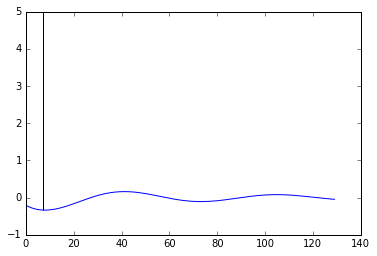

In [36]:
plt.plot(fo(np.arange(2,15,0.1)))
plt.vlines((Best_Solution[0]-2)*10,Best_Solution[1],5)

In [41]:
fo(np.pi-10**-4),fo(np.pi),fo(np.pi+10**-4)

(-0.31832001703308049, -0.31830988618379069, -0.31829975279643274)

In [130]:
np.exp(-1.1)

0.33287108369807955